In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
plt.style.use('ggplot')

In [2]:
sequences = np.load('/Users/anastasiiashcherbakova/Desktop/cleaned_sequences.npy', allow_pickle=True)

In [3]:
sequences.shape

(10304,)

In [4]:
NT_embeddings = np.load('/Users/anastasiiashcherbakova/Desktop/nucleotide_transformer_embeddings.npy', allow_pickle=True)

In [5]:
sequences

array(['ATGAATACCCGTACCCGTCCGACCACCACACCGGTTCCGCCTGTTGAAGAAACCCGTTATGAAGAAGAACTGGCACACGGTCTGGTTAAAGCAGATGAAGATGCATTTGCAGCCATTTATCGTCGTTGGGGTAGCCTGGTTCATACCCTGGCAACCCGTAGCCTGGGTGATGCACATGAAGCAGAAGATGTTACCCAGCAGGTTTTTGTTGGTGCATGGCGTGGTCGTCATGGTTTTCGTCCGGAACGTGGCACCCTGGGAGCGTGGCTGGTTGGTATTACCCGTCGTAAAGTTGTTGATGCACTGGCAGCACGCACCCGTCGTCTGAGCCTGGTTGAAAGCGCAGGTCAGGATATTACACCGGCACGTCTGGTTCAGCCTGCACTGGATGAAGTTCTGGATCGTGTTCTGCTGGTTGAAGCACTGAGCCGTCTGCCGCAGGCACAGCGTGATGTTCTGTGTATGGCATTTTATGAAGATCTGACCCAGGCACAGATTGCAGAACGTACCGGTGTTCCGCTGGGCACCGTTAAAAGCCATGCACGTCGTGGTCTGCATCGTCTGCGTACCGCAGTTGGTCCGGGTGCAGCACATGATACCTGTGTTTAAGGATCCAAGCTTGCGGCCGCACTCGAGCACCACCACCACCACCACTGAGATCCGGCTGCTAACAAAGCCCGAAAGGAAGCTGAGTTGGCTGCTGCCACCGCTGAGCAATAACTAGCATAACCCCTTGGGGCCTCTAAACGGGTCTTGAGGGGTTTTTTGCTGAAAGGAGGAACTATATCCGGATTGGCGAATGGGACGCGCCCTGTAGCGGCGCATTAAGCGCGGCGGGTGTGGTGGTTACGCGCAGCGTGACCGCTACACTTGCCAGCGCCCTAGCGCCCGCTCCTTTCGCTTTCTTCCCTTCCTTTCTCGCCACGTTCGCCGGCTTTCCCCGTCAAGCTCTAAATCGGGGGCTCCCTTTAGGGTTCCGATTTAGTGCTTTA

In [6]:
sequence_lengths = np.array([len(seq) for seq in sequences])

In [7]:
mean = np.mean(sequence_lengths)
median = np.median(sequence_lengths)
min_value = np.min(sequence_lengths)
max_value = np.max(sequence_lengths)

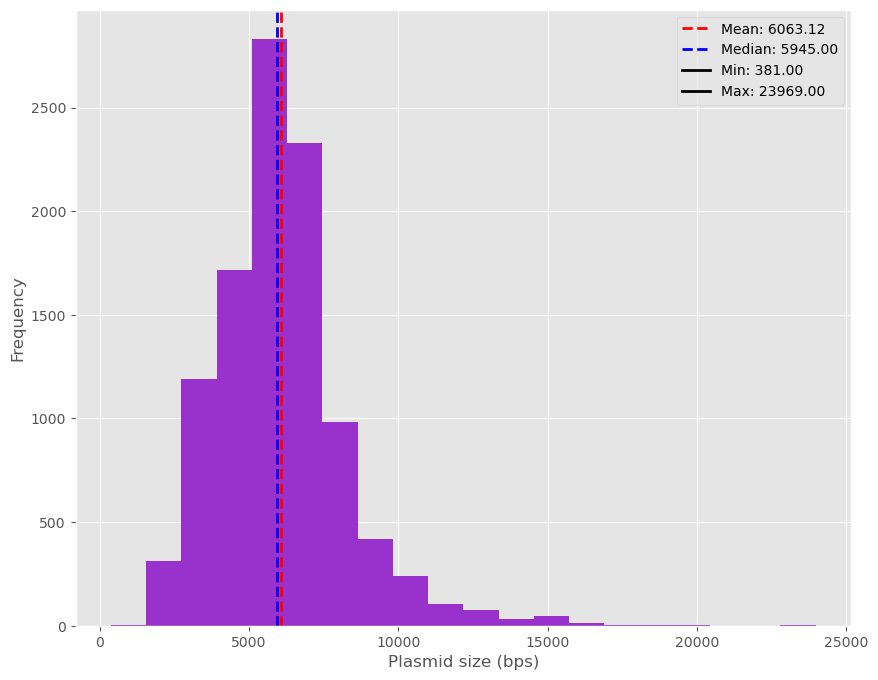

In [8]:
plt.figure(figsize=(10, 8))
plt.hist(sequence_lengths, bins=20, color='darkorchid')
plt.xlabel('Plasmid size (bps)')
plt.ylabel('Frequency')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='b', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
dummy_min = plt.Line2D([], [], color='black',  linewidth=2, label=f'Min: {min_value:.2f}')
dummy_max = plt.Line2D([], [], color='black', linewidth=2, label=f'Max: {max_value:.2f}')

handles = [plt.Line2D([], [], color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}'),
        plt.Line2D([], [], color='b', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}'),
        dummy_min, dummy_max]
plt.legend(handles=handles)
plt.savefig("/Users/anastasiiashcherbakova/git_projects/masters_project/figures/plasmid_sixe_distribution.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [9]:
def pad_and_truncate_sequences(sequences, max_len):
    processed_sequences = []
    for seq in sequences:
        if len(seq) > max_len:  # Truncate if longer than max_len
            seq = seq[:max_len]
        elif len(seq) < max_len:  # Pad if shorter than max_len
            seq = list(seq) + [''] * (max_len - len(seq))
        processed_sequences.append(seq)
    
    # Convert the list of lists into a numpy array
    result_array = np.array(processed_sequences, dtype='<U1')
    return result_array

max_len = 6000

result_array = pad_and_truncate_sequences(sequences, max_len)
print(result_array)

[['A' 'T' 'G' ... '' '' '']
 ['T' 'C' 'G' ... '' '' '']
 ['T' 'A' 'T' ... '' '' '']
 ...
 ['A' 'G' 'G' ... '' '' '']
 ['T' 'G' 'G' ... '' '' '']
 ['C' 'A' 'C' ... '' '' '']]


In [10]:
result_array.shape

(10304, 23969)

In [11]:
char_to_int = {'A': 0, 'T': 1, 'C': 2, 'G': 3, '': 4}

# Vectorize the mapping function
vectorized_map = np.vectorize(char_to_int.get)

# Map the characters to their corresponding integers
int_sequences = vectorized_map(result_array)

print(int_sequences)

[[0 1 3 ... 4 4 4]
 [1 2 3 ... 4 4 4]
 [1 0 1 ... 4 4 4]
 ...
 [0 3 3 ... 4 4 4]
 [1 3 3 ... 4 4 4]
 [2 0 2 ... 4 4 4]]


In [12]:
int_sequences.shape

(10304, 23969)

KeyboardInterrupt: 

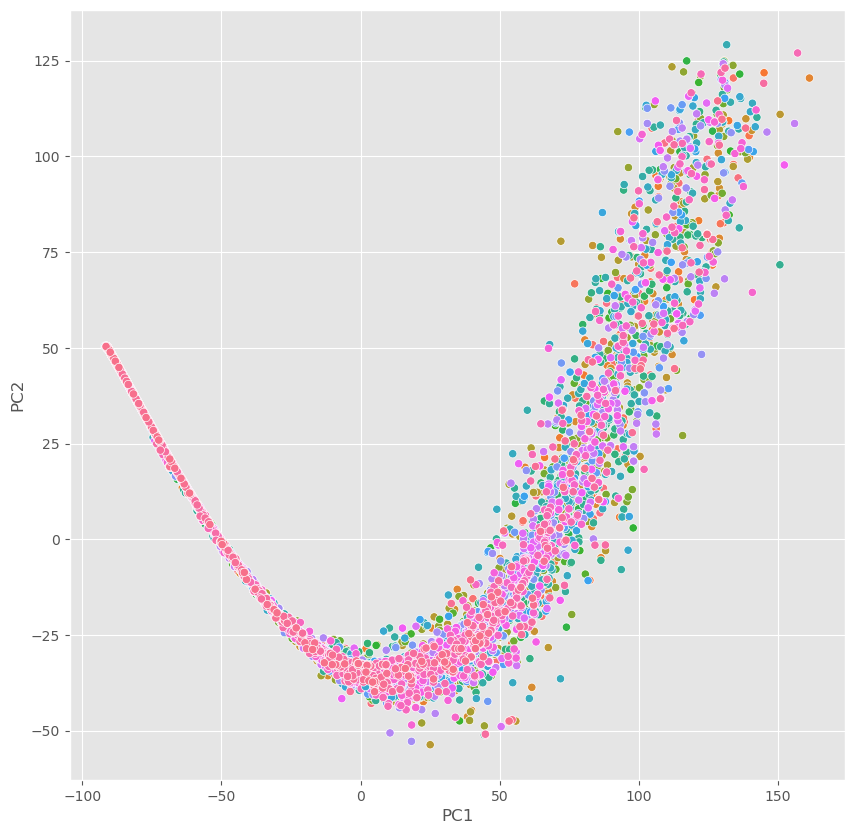

In [14]:
pca = PCA(n_components=50)
data_pca = pca.fit_transform(int_sequences)
columns = [f'PC{i+1}' for i in range(50)]
df_pca = pd.DataFrame(data_pca, columns=columns)

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue=sequences, data=df_pca)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_pca)

labels = kmeans.labels_

print(kmeans.cluster_centers_)

In [15]:
NT_embeddings.shape

(10304, 2560)

In [16]:
pca = PCA(n_components=50)
data_pca_embeddings = pca.fit_transform(NT_embeddings)
columns = [f'PC{i+1}' for i in range(50)]
data_pca_embeddings = pd.DataFrame(data_pca, columns=columns)

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue=sequences, data=data_pca_embeddings)
plt.show()

KeyboardInterrupt: 